# Parasite Chain Building

Here I'm going to try and build a parasite chain attack, with only a specific transaction for this first version. A more comprehensive version with adaptability can be developed later.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B9A57D67E0>]
Edges []
Node IDS [0]
Weights [[0, 1676, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B9A57D67E0>, <tangle.node object at 0x000002B9A57D7860>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1676, 1], [1, 1843, 2]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B9A57D67E0>, <tangle.node object at 0x000002B9A57D7860>, <tangle.node object at 0x000002B98611F590>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1676, 1], [1, 1843, 2], [2, 271, 4]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B9A57D67E0>, <tangle.node object at 0x000002B9A57D7860>, <tangle.node object at 0x000002B98611F590>, <tangle.node object at 0x000002B98611EED0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1676, 1], [1, 1843, 2], [2, 271, 4], [3, 432, 3]]


Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002B9A57D67E0>, <tangle.node object at 0x000002B9A57D7860>, <tangle.node object at 0x000002B98611F590>, <tangle.node object at 0x000002B98611EED0>, <tangle.mal_node object at 0x000002B98611F470>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 1), (4, 1), (4, 3)]
Node IDS [0, 1, 2, 3, 4]
Weights [[0, 1676, 1], [1, 1843, 2], [2, 271, 4], [3, 432, 3], [4, 1014, 1]]


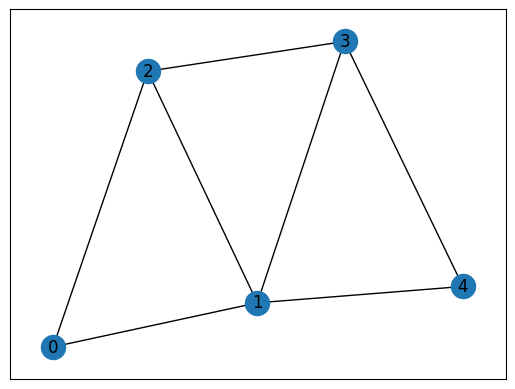

In [3]:
ng.new_node(mal=True, watch=w)

ng.plot_graph()

### Build up a small graph to add the chain to

In [4]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 0 0
2 Genesis Found
------------
Transaction number 1
Transaction Content 30
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>]
Tips 1 0
Selected Different Transactions
------------
Transaction number 2
Transaction Content 79
Node Weight 2
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>]
Tips 0 0
2 Genesis Found
------------
Transaction number 3
Transaction Content 46
Node Weight 4
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>]
Tips 1 1
Same non-genesis selected
New Tips 1 3
------------
Transaction number 4
Transaction Content 90
Node Weight 3
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>]
Tips 4 1
Selected Different Transactions
------------
Transaction number 5
Transaction Content 48
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>]
Tips 5 3
Selected Different Transac

Add the bad transaction and spam some tranasactions to make the chain.

In [5]:
ng.nodes[-1].issue_bad_transaction()
w.update()
ng.nodes[-1].spam_transactions(5)

Tips 5 2
Selected Different Transactions
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>]
Tips 7
approved <Transaction 9>
approved <Transaction 7>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>]
Tips 6
approved <Transaction 10>
approved <Transaction 6>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>]
Tips 2
approved <Transaction 11>
approved <Transaction 2>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>]
Tips 12
approved <

Make sure the chain is recorded.

In [6]:
badNode = ng.nodes[-1]
print(badNode.chain)

[<Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>]


Add more nodes after adding the original chain.

In [7]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 12 12
Same non-genesis selected
New Tips 12 8
------------
Transaction number 15
Transaction Content 19
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>]
Tips 15 13
Selected Different Transactions
------------
Transaction number 16
Transaction Content 87
Node Weight 2
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>, <Transaction 16>]
Tips 15 14
Selected Different Transactions
------------
Transaction number 17
Transaction Content 68
Node Weight 4
Confirmed Status False
[<Genesis>, <T

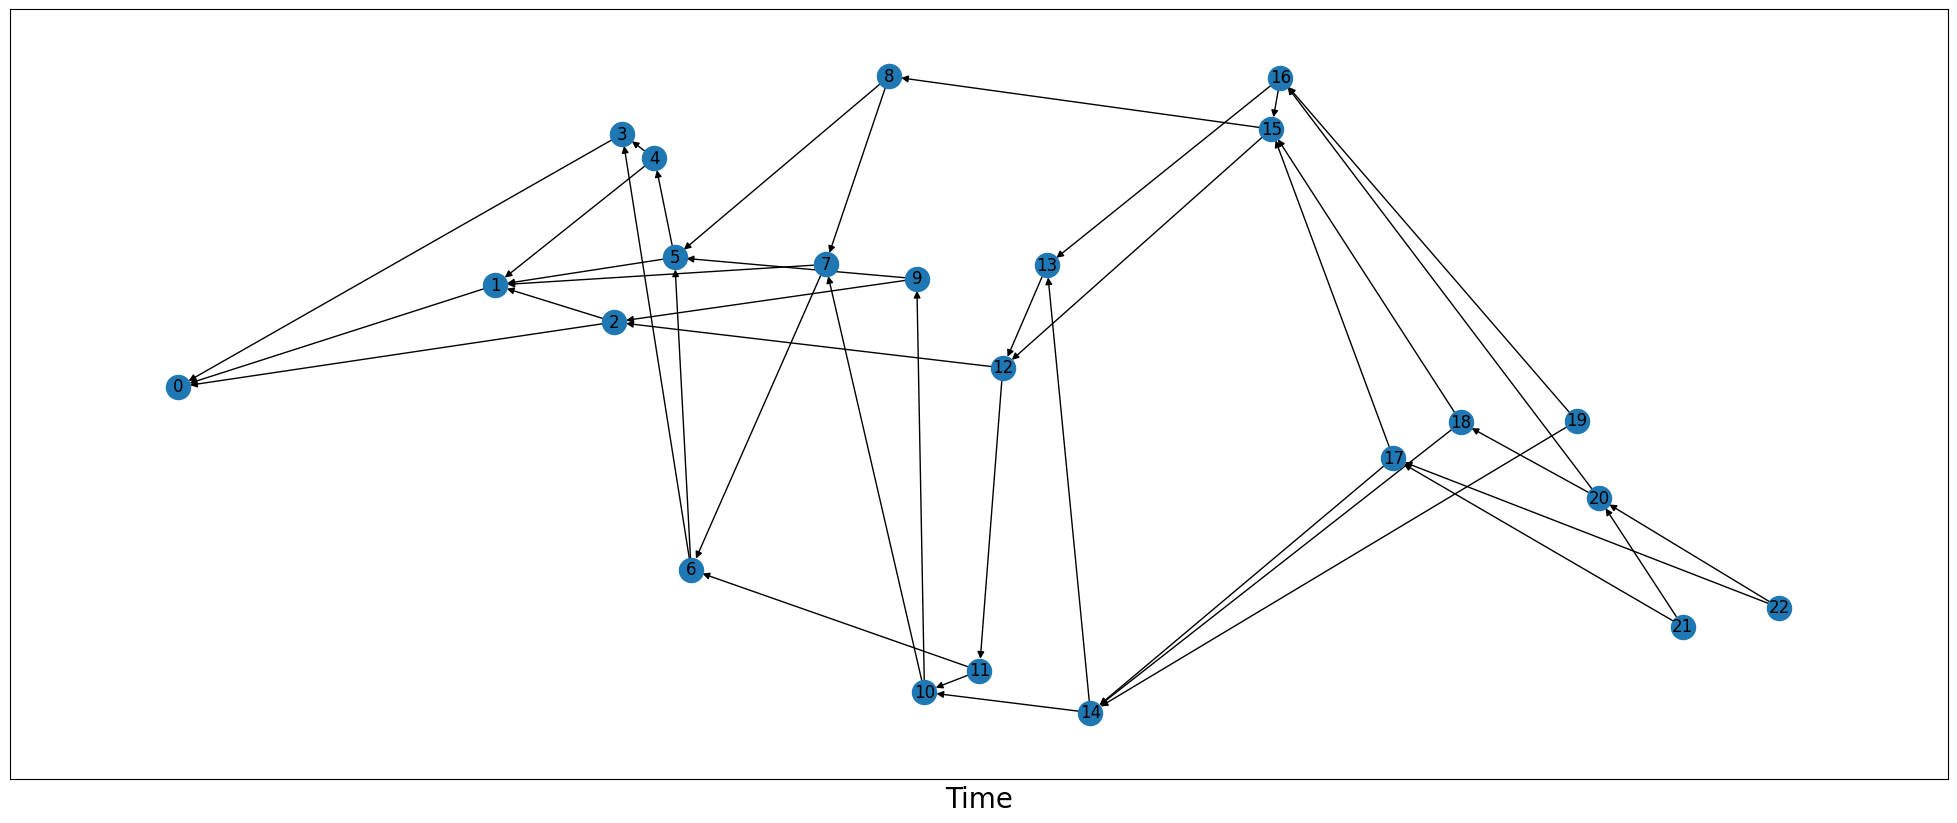

In [8]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 5, 8, 9, 10, 10, 11, 12, 14] [1.0, 1.3802782686479906, 1.897273958421897, 1.9319802082071547, 2.0724896076556614, 2.1600308410913183, 2.2316889760994396, 2.8165239310481707, 3.0935528759407336, 3.2134940784222508, 3.2470851508242267, 3.4860795098316464, 3.5878186419744025, 3.7800093061080235, 3.968880836274832, 4.756261806705086, 4.795933993285794, 5.287098292193959, 5.5811450436725085, 6.085001258573587, 6.181618208351688, 6.546201400533536, 6.966412863517009]


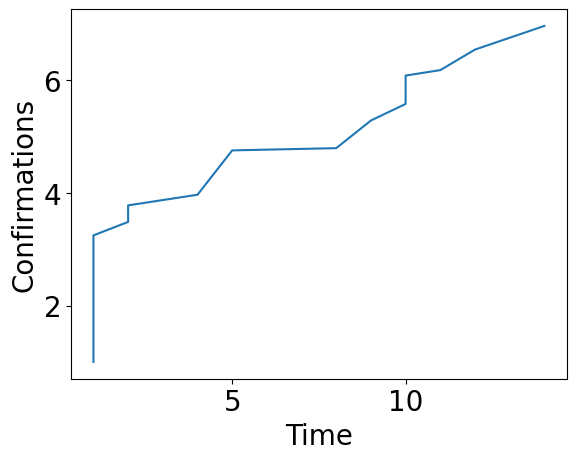

In [9]:
w.plot_confirm_over_time()

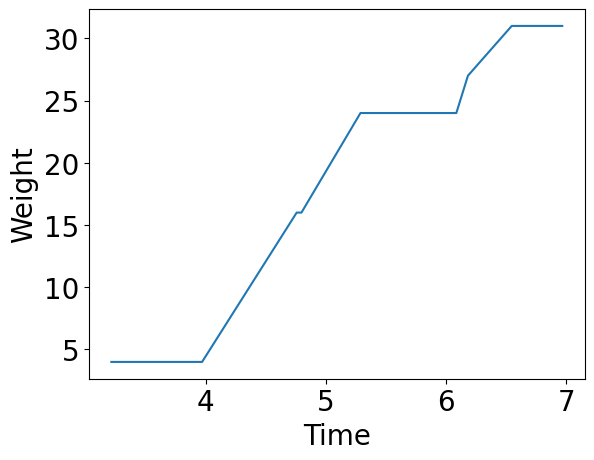

In [10]:
w.plot_PC_cum_weight()